In [64]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

In [65]:
cPath = './Dataset/'
paths = glob.glob(os.path.join(cPath, '*jpg'))

In [66]:
orb = cv2.ORB_create()

In [67]:
images=[]
descriptors=[]
for path in paths:
    img=cv2.imread(path,0)
    kp,des=orb.detectAndCompute(img,None)
    images.append(img)
    descriptors.append(des)

In [68]:
len(images),len(descriptors)

(61, 61)

In [69]:
qimage=cv2.imread('./Dataset/aug_1_6802.jpg',0)
qkp,qdes=orb.detectAndCompute(qimage,None)

In [70]:
qimage

array([[ 97,  97,  97, ...,  97,  97,  97],
       [ 97,  97,  97, ...,  97,  97,  97],
       [ 97,  97,  97, ...,  97,  97,  97],
       ...,
       [110, 110, 110, ..., 118, 118, 118],
       [110, 110, 110, ..., 115, 118, 120],
       [110, 110, 110, ..., 113, 117, 121]], shape=(224, 224), dtype=uint8)

In [71]:
des.shape

(294, 32)

In [72]:
qdes.shape

(416, 32)

In [75]:
distances={}
for idx,des in enumerate(descriptors):
    if des is not None and qdes is not None and qdes.shape[1]==des.shape[1]:
        bf=cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches=bf.match(qdes,des)
        dist=sum([match.distance for match in matches])/len(matches)
        distances[paths[idx]]=dist
sorted_distances=dict(sorted(distances.items(),key=lambda item:item[1]))

In [76]:
sorted_distances

{'./Dataset\\aug_1_6802.jpg': 0.0,
 './Dataset\\aug_1_1377.jpg': 24.913265306122447,
 './Dataset\\aug_1_6367.jpg': 25.08108108108108,
 './Dataset\\aug_1_6888.jpg': 27.795031055900623,
 './Dataset\\aug_1_5340.jpg': 28.977011494252874,
 './Dataset\\aug_1_2149.jpg': 30.2992700729927,
 './Dataset\\aug_1_8292.jpg': 30.593984962406015,
 './Dataset\\aug_1_1112.jpg': 31.32236842105263,
 './Dataset\\aug_1_3499.jpg': 35.32743362831859,
 './Dataset\\aug_1_4042.jpg': 40.66197183098591,
 './Dataset\\aug_1_8906.jpg': 41.49382716049383,
 './Dataset\\aug_1_3958.jpg': 42.11904761904762,
 './Dataset\\aug_1_9514.jpg': 42.29577464788732,
 './Dataset\\aug_1_2912.jpg': 42.4,
 './Dataset\\aug_1_6396.jpg': 42.55,
 './Dataset\\aug_1_2194.jpg': 43.82608695652174,
 './Dataset\\aug_1_6471.jpg': 45.10144927536232,
 './Dataset\\aug_1_5743.jpg': 45.61842105263158,
 './Dataset\\aug_1_4304.jpg': 46.16,
 './Dataset\\aug_1_7644.jpg': 48.108108108108105,
 './Dataset\\10KRA2V6IR4W.jpg': 55.417910447761194,
 './Dataset\\AV

./Dataset\aug_1_6802.jpg


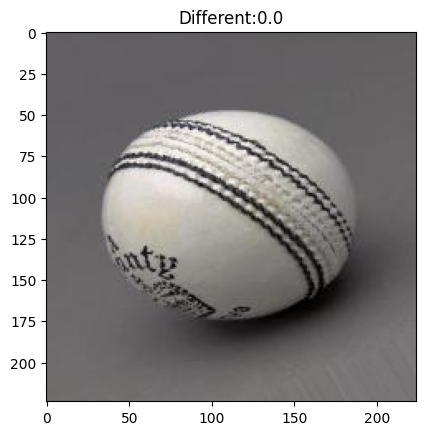

./Dataset\aug_1_1377.jpg


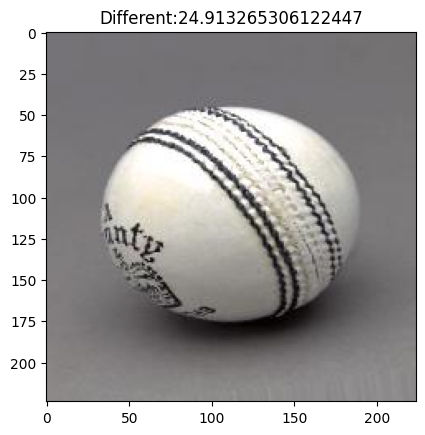

./Dataset\aug_1_6367.jpg


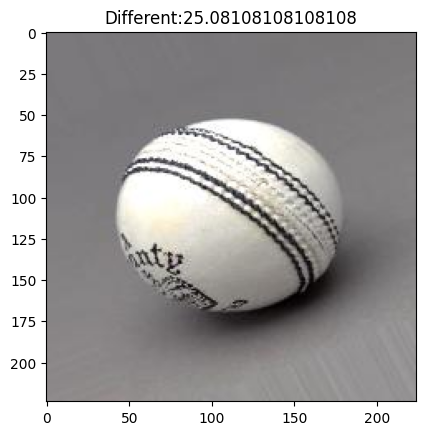

./Dataset\aug_1_6888.jpg


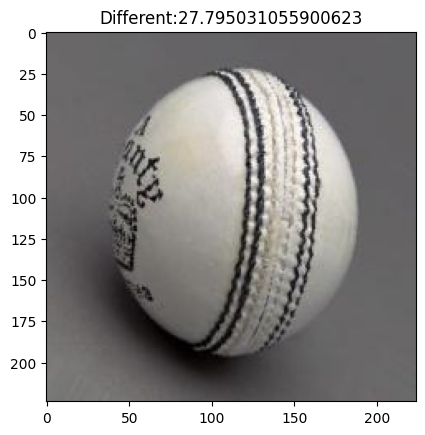

./Dataset\aug_1_5340.jpg


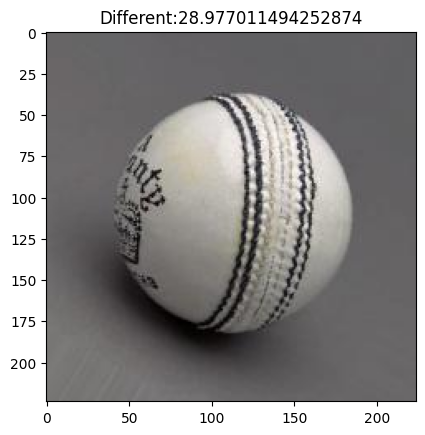

./Dataset\aug_1_2149.jpg


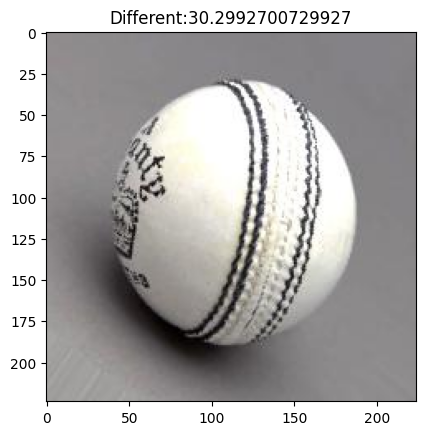

./Dataset\aug_1_8292.jpg


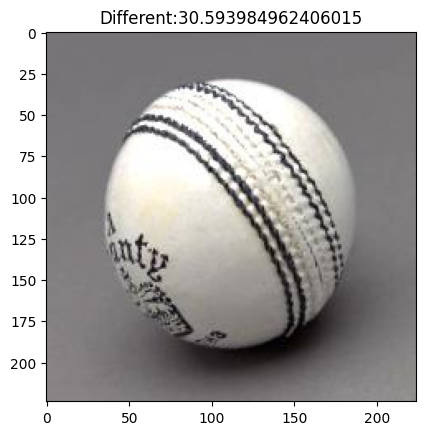

./Dataset\aug_1_1112.jpg


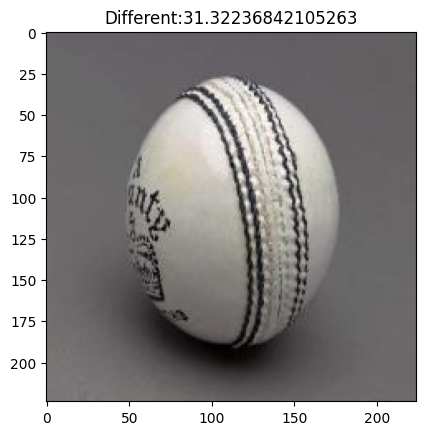

./Dataset\aug_1_3499.jpg


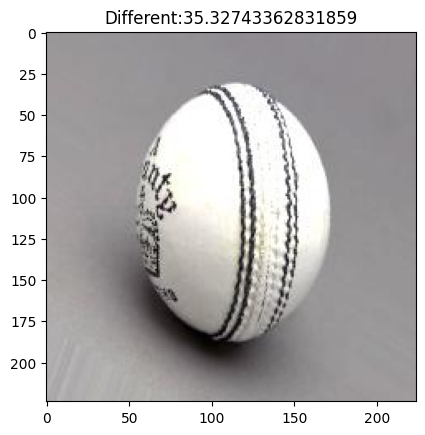

./Dataset\aug_1_4042.jpg


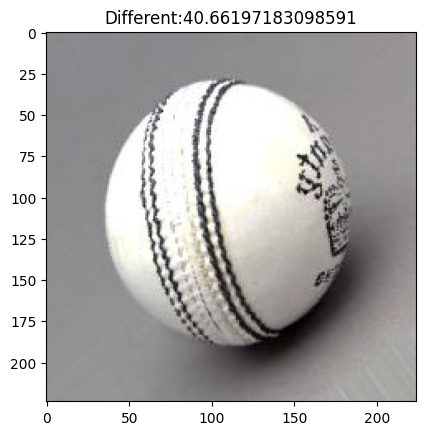

In [84]:
limit=0
for key,sim in sorted_distances.items():
    path=key
    image=cv2.imread(path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    print(path)
    plt.imshow(image)
    plt.title('Different:'+ str(sim))
    plt.show()
    limit+=1
    if limit==10:
        break